# 29. 데이터 이해하기

In [1]:
!pip install pyupbit
# https://github.com/sharebook-kr/pyupbit
!pip install pandas

In [1]:
# noinspection JupyterPackage
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyupbit
plt.style.use("seaborn")

In [3]:
df = pyupbit.get_ohlcv("KRW-BTC", interval="day", count=365).loc[:, "close"].to_frame()
df.rename(columns = {'close':'price'},inplace=True)
df

,price
2021-05-29 09:00:00+09:00,42688000.0
2021-05-30 09:00:00+09:00,43177000.0
2021-05-31 09:00:00+09:00,43761000.0
2021-06-01 09:00:00+09:00,43200000.0
2021-06-02 09:00:00+09:00,43732000.0
...,...
2022-05-24 09:00:00+09:00,37827000.0
2022-05-25 09:00:00+09:00,37935000.0
2022-05-26 09:00:00+09:00,37662000.0
2022-05-27 09:00:00+09:00,36837000.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2021-05-29 09:00:00+09:00 to 2022-05-28 09:00:00+09:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   365 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


<AxesSubplot:>

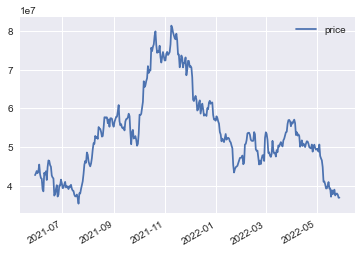

In [5]:
df.plot()

In [6]:
df["returns"] = np.log(df.div(df.shift(1)))

In [7]:
df

,price,returns
2021-05-29 09:00:00+09:00,42688000.0,NaN
2021-05-30 09:00:00+09:00,43177000.0,0.011390
2021-05-31 09:00:00+09:00,43761000.0,0.013435
2021-06-01 09:00:00+09:00,43200000.0,-0.012903
2021-06-02 09:00:00+09:00,43732000.0,0.012240
...,...,...
2022-05-24 09:00:00+09:00,37827000.0,0.010390
2022-05-25 09:00:00+09:00,37935000.0,0.002851
2022-05-26 09:00:00+09:00,37662000.0,-0.007223
2022-05-27 09:00:00+09:00,36837000.0,-0.022149


# 30. 간단한 매수 후 보유 전략

In [8]:
df.dropna(inplace = True)

In [9]:
df

,price,returns
2021-05-30 09:00:00+09:00,43177000.0,0.011390
2021-05-31 09:00:00+09:00,43761000.0,0.013435
2021-06-01 09:00:00+09:00,43200000.0,-0.012903
2021-06-02 09:00:00+09:00,43732000.0,0.012240
2021-06-03 09:00:00+09:00,45431000.0,0.038115
...,...,...
2022-05-24 09:00:00+09:00,37827000.0,0.010390
2022-05-25 09:00:00+09:00,37935000.0,0.002851
2022-05-26 09:00:00+09:00,37662000.0,-0.007223
2022-05-27 09:00:00+09:00,36837000.0,-0.022149


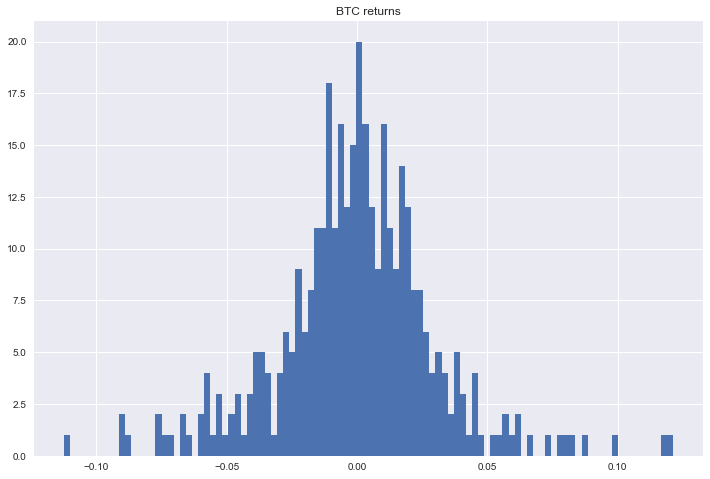

In [10]:
df.returns.hist(bins = 100, figsize = (12, 8))
plt.title("BTC returns")
plt.show()

In [11]:
df.returns.sum()

-0.14660100832258827

In [12]:
np.exp(df.returns.sum())

0.8636384932533736

In [13]:
df.price[-1]/df.price[0] # 위의 결과와 다른 이유는?

0.8538573777705722

In [14]:
df["creturns"] = df.returns.cumsum().apply(np.exp)

In [15]:
df

,price,returns,creturns
2021-05-30 09:00:00+09:00,43177000.0,0.011390,1.011455
2021-05-31 09:00:00+09:00,43761000.0,0.013435,1.025136
2021-06-01 09:00:00+09:00,43200000.0,-0.012903,1.011994
2021-06-02 09:00:00+09:00,43732000.0,0.012240,1.024457
2021-06-03 09:00:00+09:00,45431000.0,0.038115,1.064257
...,...,...,...
2022-05-24 09:00:00+09:00,37827000.0,0.010390,0.886127
2022-05-25 09:00:00+09:00,37935000.0,0.002851,0.888657
2022-05-26 09:00:00+09:00,37662000.0,-0.007223,0.882262
2022-05-27 09:00:00+09:00,36837000.0,-0.022149,0.862936


<AxesSubplot:title={'center':'btc - buy and hold'}>

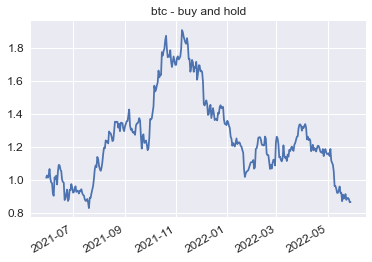

In [16]:
df.creturns.plot(figsize=(6,4), title="btc - buy and hold", fontsize=12)

<AxesSubplot:title={'center':'btc - price'}>

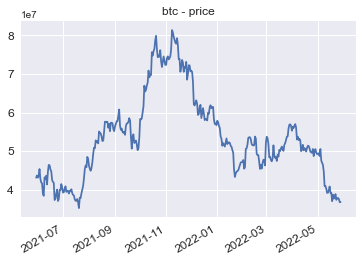

In [17]:
df.price.plot(figsize=(6,4), title="btc - price", fontsize=12)

# 31. 성능 지표



In [18]:
df

,price,returns,creturns
2021-05-30 09:00:00+09:00,43177000.0,0.011390,1.011455
2021-05-31 09:00:00+09:00,43761000.0,0.013435,1.025136
2021-06-01 09:00:00+09:00,43200000.0,-0.012903,1.011994
2021-06-02 09:00:00+09:00,43732000.0,0.012240,1.024457
2021-06-03 09:00:00+09:00,45431000.0,0.038115,1.064257
...,...,...,...
2022-05-24 09:00:00+09:00,37827000.0,0.010390,0.886127
2022-05-25 09:00:00+09:00,37935000.0,0.002851,0.888657
2022-05-26 09:00:00+09:00,37662000.0,-0.007223,0.882262
2022-05-27 09:00:00+09:00,36837000.0,-0.022149,0.862936


In [19]:
df.creturns.iloc[-1]

0.8636384932533733

In [20]:
df.returns.sum()

-0.14660100832258827

In [21]:
df.describe()

,price,returns,creturns
count,3.640000e+02,364.000000,364.000000
mean,5.349213e+07,-0.000403,1.253095
std,1.094548e+07,0.030562,0.256406
min,3.530500e+07,-0.112417,0.827047
25%,4.582850e+07,-0.015188,1.073569
50%,5.188350e+07,0.000288,1.215412
75%,5.802975e+07,0.016547,1.359393
max,8.140300e+07,0.121214,1.906929


In [22]:
df.returns.mean() * 364 # mean return

-0.14660100832258827

In [23]:
df.returns.std() * np.sqrt(364) #risk

0.58307837354035

In [24]:
df

,price,returns,creturns
2021-05-30 09:00:00+09:00,43177000.0,0.011390,1.011455
2021-05-31 09:00:00+09:00,43761000.0,0.013435,1.025136
2021-06-01 09:00:00+09:00,43200000.0,-0.012903,1.011994
2021-06-02 09:00:00+09:00,43732000.0,0.012240,1.024457
2021-06-03 09:00:00+09:00,45431000.0,0.038115,1.064257
...,...,...,...
2022-05-24 09:00:00+09:00,37827000.0,0.010390,0.886127
2022-05-25 09:00:00+09:00,37935000.0,0.002851,0.888657
2022-05-26 09:00:00+09:00,37662000.0,-0.007223,0.882262
2022-05-27 09:00:00+09:00,36837000.0,-0.022149,0.862936


In [25]:
df["cummax"] = df.creturns.cummax()

<AxesSubplot:title={'center':'btc - max drawdown'}>

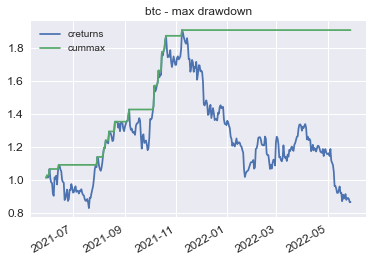

In [26]:
df[["creturns", "cummax"]].plot(figsize=(6,4), title="btc - max drawdown", fontsize=12)

In [27]:
drawdown = df["cummax"] - df["creturns"]
drawdown

2021-05-30 09:00:00+09:00    0.000000
2021-05-31 09:00:00+09:00    0.000000
2021-06-01 09:00:00+09:00    0.013142
2021-06-02 09:00:00+09:00    0.000679
2021-06-03 09:00:00+09:00    0.000000
                               ...   
2022-05-24 09:00:00+09:00    1.020802
2022-05-25 09:00:00+09:00    1.018272
2022-05-26 09:00:00+09:00    1.024667
2022-05-27 09:00:00+09:00    1.043994
2022-05-28 09:00:00+09:00    1.043291
Length: 364, dtype: float64

In [28]:
drawdown.max()

1.0439936281859064

In [29]:
drawdown.idxmax()

Timestamp('2022-05-27 09:00:00+0900', tz='대한민국 표준시')

# 32. SMA 교차전략 - 개요

In [30]:
!pip install cufflinks
!pip install chart_studio

In [31]:
import cufflinks as cf
import chart_studio
chart_studio.tools.set_credentials_file(username='test', api_key='api_test')
cf.go_offline(connected=True)
import plotly.io as pio
pio.renderers.default = "colab"

In [32]:
df = pyupbit.get_ohlcv("KRW-BTC", interval="day", count=365)
qf = cf.QuantFig(df = df.loc["2021":"2022"])

In [94]:
qf.iplot(title="BTC", name = "BTC")

In [95]:
qf.add_sma(periods=20)
qf.add_sma(periods=100)

In [96]:
qf.iplot(title="BTC", name="BTC")

# 33. SMA 교차전략 정의하기

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyupbit 
plt.style.use("seaborn")

In [37]:
df = pyupbit.get_ohlcv("KRW-BTC", interval="day", count=730).loc[:, "close"].to_frame()
df.rename(columns = {'close':'price'},inplace=True)
df

,price
2020-05-29 09:00:00+09:00,11398000.0
2020-05-30 09:00:00+09:00,11581000.0
2020-05-31 09:00:00+09:00,11432000.0
2020-06-01 09:00:00+09:00,12112000.0
2020-06-02 09:00:00+09:00,11520000.0
...,...
2022-05-24 09:00:00+09:00,37827000.0
2022-05-25 09:00:00+09:00,37935000.0
2022-05-26 09:00:00+09:00,37662000.0
2022-05-27 09:00:00+09:00,36837000.0


In [38]:
sma_s = 50
sma_l = 200

In [39]:
df["SMA_S"] = df.price.rolling(sma_s).mean()

In [40]:
df["SMA_L"] = df.price.rolling(sma_l).mean()

In [41]:
df

,price,SMA_S,SMA_L
2020-05-29 09:00:00+09:00,11398000.0,NaN,NaN
2020-05-30 09:00:00+09:00,11581000.0,NaN,NaN
2020-05-31 09:00:00+09:00,11432000.0,NaN,NaN
2020-06-01 09:00:00+09:00,12112000.0,NaN,NaN
2020-06-02 09:00:00+09:00,11520000.0,NaN,NaN
...,...,...,...
2022-05-24 09:00:00+09:00,37827000.0,46781900.0,54332310.0
2022-05-25 09:00:00+09:00,37935000.0,46417500.0,54149110.0
2022-05-26 09:00:00+09:00,37662000.0,46109300.0,53954740.0
2022-05-27 09:00:00+09:00,36837000.0,45769760.0,53731910.0


<AxesSubplot:title={'center':'BTC - SMA50 | SMA200'}>

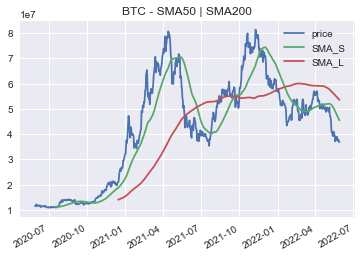

In [42]:
df.plot(figsize=(6,4), title="BTC - SMA{} | SMA{}".format(sma_s, sma_l))

<AxesSubplot:title={'center':'BTC - SMA50 | SMA200'}>

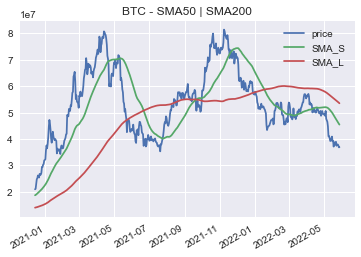

In [43]:
df.dropna(inplace=True)
df.plot(figsize=(6,4), title="BTC - SMA{} | SMA{}".format(sma_s, sma_l))

In [44]:
df["position"] = np.where(df["SMA_S"] > df["SMA_L"], 1, -1)
df

,price,SMA_S,SMA_L,position
2020-12-14 09:00:00+09:00,20939000.0,18674700.0,13980690.0,1
2020-12-15 09:00:00+09:00,21103000.0,18801480.0,14029215.0,1
2020-12-16 09:00:00+09:00,22888000.0,18953000.0,14085750.0,1
2020-12-17 09:00:00+09:00,24743000.0,19146660.0,14152305.0,1
2020-12-18 09:00:00+09:00,25151000.0,19345540.0,14217500.0,1
...,...,...,...,...
2022-05-24 09:00:00+09:00,37827000.0,46781900.0,54332310.0,-1
2022-05-25 09:00:00+09:00,37935000.0,46417500.0,54149110.0,-1
2022-05-26 09:00:00+09:00,37662000.0,46109300.0,53954740.0,-1
2022-05-27 09:00:00+09:00,36837000.0,45769760.0,53731910.0,-1


<AxesSubplot:title={'center':'BTC - SMA50 | SMA200'}>

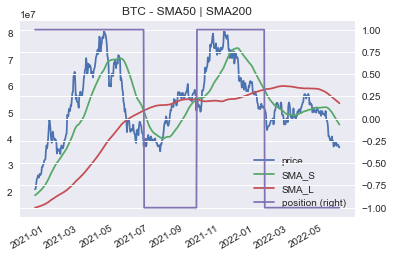

In [45]:
df.plot(figsize=(6,4), title="BTC - SMA{} | SMA{}".format(sma_s, sma_l), secondary_y="position")

# 34. 백터화된 백 테스팅 전략

In [46]:
df

,price,SMA_S,SMA_L,position
2020-12-14 09:00:00+09:00,20939000.0,18674700.0,13980690.0,1
2020-12-15 09:00:00+09:00,21103000.0,18801480.0,14029215.0,1
2020-12-16 09:00:00+09:00,22888000.0,18953000.0,14085750.0,1
2020-12-17 09:00:00+09:00,24743000.0,19146660.0,14152305.0,1
2020-12-18 09:00:00+09:00,25151000.0,19345540.0,14217500.0,1
...,...,...,...,...
2022-05-24 09:00:00+09:00,37827000.0,46781900.0,54332310.0,-1
2022-05-25 09:00:00+09:00,37935000.0,46417500.0,54149110.0,-1
2022-05-26 09:00:00+09:00,37662000.0,46109300.0,53954740.0,-1
2022-05-27 09:00:00+09:00,36837000.0,45769760.0,53731910.0,-1


In [47]:
df["returns"] = np.log(df.price.div(df.price.shift(1)))
df

,price,SMA_S,SMA_L,position,returns
2020-12-14 09:00:00+09:00,20939000.0,18674700.0,13980690.0,1,NaN
2020-12-15 09:00:00+09:00,21103000.0,18801480.0,14029215.0,1,0.007802
2020-12-16 09:00:00+09:00,22888000.0,18953000.0,14085750.0,1,0.081198
2020-12-17 09:00:00+09:00,24743000.0,19146660.0,14152305.0,1,0.077930
2020-12-18 09:00:00+09:00,25151000.0,19345540.0,14217500.0,1,0.016355
...,...,...,...,...,...
2022-05-24 09:00:00+09:00,37827000.0,46781900.0,54332310.0,-1,0.010390
2022-05-25 09:00:00+09:00,37935000.0,46417500.0,54149110.0,-1,0.002851
2022-05-26 09:00:00+09:00,37662000.0,46109300.0,53954740.0,-1,-0.007223
2022-05-27 09:00:00+09:00,36837000.0,45769760.0,53731910.0,-1,-0.022149


In [48]:
df["strategy"] = df.position.shift(1) * df["returns"]
df

,price,SMA_S,SMA_L,position,returns,strategy
2020-12-14 09:00:00+09:00,20939000.0,18674700.0,13980690.0,1,NaN,NaN
2020-12-15 09:00:00+09:00,21103000.0,18801480.0,14029215.0,1,0.007802,0.007802
2020-12-16 09:00:00+09:00,22888000.0,18953000.0,14085750.0,1,0.081198,0.081198
2020-12-17 09:00:00+09:00,24743000.0,19146660.0,14152305.0,1,0.077930,0.077930
2020-12-18 09:00:00+09:00,25151000.0,19345540.0,14217500.0,1,0.016355,0.016355
...,...,...,...,...,...,...
2022-05-24 09:00:00+09:00,37827000.0,46781900.0,54332310.0,-1,0.010390,-0.010390
2022-05-25 09:00:00+09:00,37935000.0,46417500.0,54149110.0,-1,0.002851,-0.002851
2022-05-26 09:00:00+09:00,37662000.0,46109300.0,53954740.0,-1,-0.007223,0.007223
2022-05-27 09:00:00+09:00,36837000.0,45769760.0,53731910.0,-1,-0.022149,0.022149


In [49]:
df.dropna(inplace = True)

In [50]:
df[["returns", "strategy"]].sum()

returns     0.565703
strategy    0.512872
dtype: float64

In [51]:
df[["returns", "strategy"]].sum().apply(np.exp)

returns     1.760686
strategy    1.670081
dtype: float64

In [52]:
df[["returns", "strategy"]].mean()

returns     0.001067
strategy    0.000968
dtype: float64

In [53]:
df[["returns", "strategy"]].std() * np.sqrt(365)

returns     0.669367
strategy    0.669423
dtype: float64

In [54]:
df["creturns"] = df["returns"].cumsum().apply(np.exp)
df["cstrategy"] = df["strategy"].cumsum().apply(np.exp)

In [55]:
df

,price,SMA_S,SMA_L,position,returns,strategy,creturns,cstrategy
2020-12-15 09:00:00+09:00,21103000.0,18801480.0,14029215.0,1,0.007802,0.007802,1.007832,1.007832
2020-12-16 09:00:00+09:00,22888000.0,18953000.0,14085750.0,1,0.081198,0.081198,1.093080,1.093080
2020-12-17 09:00:00+09:00,24743000.0,19146660.0,14152305.0,1,0.077930,0.077930,1.181671,1.181671
2020-12-18 09:00:00+09:00,25151000.0,19345540.0,14217500.0,1,0.016355,0.016355,1.201156,1.201156
2020-12-19 09:00:00+09:00,26169000.0,19562120.0,14290745.0,1,0.039678,0.039678,1.249773,1.249773
...,...,...,...,...,...,...,...,...
2022-05-24 09:00:00+09:00,37827000.0,46781900.0,54332310.0,-1,0.010390,-0.010390,1.806533,1.627697
2022-05-25 09:00:00+09:00,37935000.0,46417500.0,54149110.0,-1,0.002851,-0.002851,1.811691,1.623062
2022-05-26 09:00:00+09:00,37662000.0,46109300.0,53954740.0,-1,-0.007223,0.007223,1.798653,1.634828
2022-05-27 09:00:00+09:00,36837000.0,45769760.0,53731910.0,-1,-0.022149,0.022149,1.759253,1.671441


<AxesSubplot:title={'center':'BTC - strategy'}>

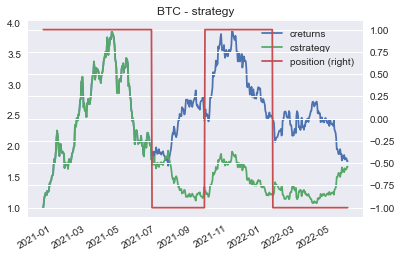

In [56]:
df[["creturns", "cstrategy","position"]].plot(figsize=(6,4), title="BTC - strategy", secondary_y="position")

<AxesSubplot:title={'center':'BTC - strategy'}>

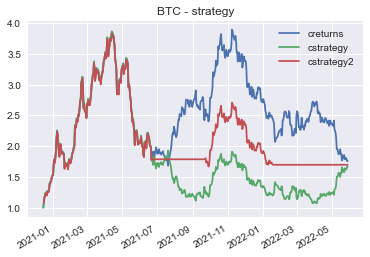

In [57]:
df["position2"] = np.where(df["SMA_S"] > df["SMA_L"], 1, 0)
df["strategy2"] = df.position2.shift(1) * df["returns"]
df["cstrategy2"] = df["strategy2"].cumsum().apply(np.exp)
df[["creturns", "cstrategy","cstrategy2"]].plot(figsize=(6,4), title="BTC - strategy")

In [58]:
outperf = df.cstrategy.iloc[-1] - df.creturns.iloc[-1]
outperf

-0.09060481253585895

# 35. 최적의 SMA 전략 찾기

In [59]:
df = pyupbit.get_ohlcv("KRW-BTC", interval="day", count=730).loc[:, "close"].to_frame()
df.rename(columns = {'close':'price'},inplace=True)

In [60]:
def run_strategy(SMA):
  data = df.copy()
  data["returns"] = np.log(data.price.div(data.price.shift(1)))
  data["SMA_S"] = data.price.rolling(int(SMA[0])).mean()
  data["SMA_L"] = data.price.rolling(int(SMA[1])).mean()
  data.dropna(inplace = True)
  data["position"] = np.where(data["SMA_S"] > data["SMA_L"], 1, -1)
  data["strategy"] = data.position.shift(1) * data["returns"]
  data.dropna(inplace = True)

  return data[["returns", "strategy"]].sum().apply(np.exp)

In [61]:
run_strategy((50, 200))

returns     1.760638
strategy    1.670126
dtype: float64

In [62]:
run_strategy((10, 200))

returns     1.760638
strategy    1.677957
dtype: float64

In [63]:
run_strategy((10, 20))

returns     3.223398
strategy    3.213292
dtype: float64

In [64]:
def run_strategy(SMA):
  data = df.copy()
  data["returns"] = np.log(data.price.div(data.price.shift(1)))
  data["SMA_S"] = data.price.rolling(int(SMA[0])).mean()
  data["SMA_L"] = data.price.rolling(int(SMA[1])).mean()
  data.dropna(inplace = True)
  data["position"] = np.where(data["SMA_S"] > data["SMA_L"], 1, -1)
  data["strategy"] = data.position.shift(1) * data["returns"]
  data.dropna(inplace = True)

  return -data[["returns", "strategy"]].sum().apply(np.exp)[-1]

In [66]:
import scipy.optimize as optimize
from scipy.optimize import brute

In [67]:
brute(run_strategy, ((20, 40, 1), (150, 200, 1)), finish=None)

array([ 20., 150.])

In [68]:
run_strategy((20,150))

-4.275656585211397

In [69]:
run_strategy((20,130))

-4.188877136916856

In [105]:
%load_ext autoreload
%autoreload 2 # 실행전 외부 라이브러리 다시 로드
from lib.CoinInstrument import CoinInstrument

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [106]:
btc_minute = CoinInstrument('KRW-BTC', count=730, interval='day', to='2022-05-26 20:00')

In [107]:
btc_minute.tail()

,open,high,low,close,volume,value,log_returns
2022-05-22 09:00:00+09:00,38037000.0,39150000.0,37886000.0,38933000.0,3336.520707,1.285776e+11,0.023283
2022-05-23 09:00:00+09:00,38933000.0,39220000.0,37209000.0,37436000.0,4947.221049,1.903346e+11,-0.039209
2022-05-24 09:00:00+09:00,37436000.0,38000000.0,36725000.0,37827000.0,3823.785368,1.429107e+11,0.010390
2022-05-25 09:00:00+09:00,37827000.0,38360000.0,37558000.0,37935000.0,3871.091337,1.471377e+11,0.002851
2022-05-26 09:00:00+09:00,37937000.0,38230000.0,36394000.0,37662000.0,5202.304333,1.955051e+11,-0.007223


In [19]:
%reload_ext autoreload
%autoreload 2 # 실행전 외부 라이브러리 다시 로드
%reload_ext autoreload

from lib.CoinInstrument import CoinInstrument
from scipy.optimize import brute

class SMABackTester:
  def __init__(self, symbol, to=None, count=200, interval='day', period=0.5, SMA_S=50, SMA_L=200):
    self.results = None
    self._data = None
    self.coinInstrument = CoinInstrument(symbol, to, count, interval, period)
    self._SMA_S = SMA_S
    self._SMA_L = SMA_L
    self.load_data()

  def __repr__(self):
    return "SMABackTester(ticker={}, to={}, count={}, interval={}, SMA_S={}, SMA_L={})"\
      .format(self.coinInstrument.ticker, self.coinInstrument.to, self.coinInstrument.count, self.coinInstrument.interval, self._SMA_S, self._SMA_L)

  def load_data(self):
    self._data = pd.DataFrame()
    self._data["SMA_S"] = self.coinInstrument.sma(self._SMA_S)
    self._data["SMA_L"] = self.coinInstrument.sma(self._SMA_L)

  def set_parameters(self, SMA_S=None, SMA_L=None):
    if SMA_S is not None:
      self._SMA_S = SMA_S
    if SMA_L is not None:
      self._SMA_L = SMA_L
    self.load_data()

  def test_strategy(self):
    data = self._data.copy()
    data["returns"] = self.coinInstrument.log_returns()
    data.dropna(inplace=True)
    data["position"] = np.where(data["SMA_S"]>data["SMA_L"], 1, -1)
    data["strategy"] = data["position"].shift(1) * data["returns"]
    data.dropna(inplace=True)
    data["creturns"] = data["returns"].cumsum().apply(np.exp)
    data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)
    self.results = data
    perf = data["cstrategy"].iloc[-1]
    outperf = perf - data["creturns"].iloc[-1]
    return round(perf, 6), round(outperf, 6)

  def plot_returns(self):
    if self.results is None:
      print("No results to plot yet. Run a strategy")
    else:
      title = "{} | SMA_S = {} | SMA_L = {}".format(self.coinInstrument.symbol(), self._SMA_S, self._SMA_L)
      self.results[["creturns", "cstrategy"]].plot(title=title, figsize=(6,4))

  def update_and_run(self, SMA):
    self.set_parameters(int(SMA[0]), int(SMA[1]))
    return -self.test_strategy()[0]

  def optimize_parameters(self, SMA_S_range, SMA_L_range):
    opt = brute(self.update_and_run, (SMA_S_range, SMA_L_range), finish=None)
    return opt, -self.update_and_run(opt)

In [20]:
tester = SMABackTester("KRW-BTC", count=730, interval='day', to='2022-05-28 21:00')

In [14]:
tester

SMABackTester(ticker=KRW-BTC, to=2022-05-28 21:00, count=730, interval=day, SMA_S=50, SMA_L=200)

In [28]:
tester._data

,SMA_S,SMA_L
2020-05-28 09:00:00+09:00,NaN,NaN
2020-05-29 09:00:00+09:00,NaN,NaN
2020-05-30 09:00:00+09:00,NaN,NaN
2020-05-31 09:00:00+09:00,NaN,NaN
2020-06-01 09:00:00+09:00,NaN,NaN
...,...,...
2022-05-23 09:00:00+09:00,47166460.0,54513780.0
2022-05-24 09:00:00+09:00,46781900.0,54332310.0
2022-05-25 09:00:00+09:00,46417500.0,54149110.0
2022-05-26 09:00:00+09:00,46109300.0,53954740.0


In [29]:
tester.set_parameters(20, 100)

In [30]:
tester

SMABackTester(ticker=KRW-BTC, to=2022-05-27 17:00, count=730, interval=day, SMA_S=20, SMA_L=100)

In [5]:
tester.test_strategy()

2022-05-23 09:00:00+09:00   -0.039209
2022-05-24 09:00:00+09:00    0.010390
2022-05-25 09:00:00+09:00    0.002851
2022-05-26 09:00:00+09:00   -0.007223
2022-05-27 09:00:00+09:00   -0.022149
Name: close, dtype: float64


(1.683177, -0.088429)

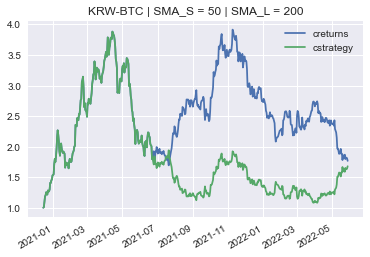

In [6]:
tester.plot_returns()

In [9]:
tester.update_and_run((20, 100))

2022-05-23 09:00:00+09:00   -0.039209
2022-05-24 09:00:00+09:00    0.010390
2022-05-25 09:00:00+09:00    0.002851
2022-05-26 09:00:00+09:00   -0.007223
2022-05-27 09:00:00+09:00   -0.022149
Name: close, dtype: float64


4.538673

In [10]:
tester.update_and_run((25, 100))

2022-05-23 09:00:00+09:00   -0.039209
2022-05-24 09:00:00+09:00    0.010390
2022-05-25 09:00:00+09:00    0.002851
2022-05-26 09:00:00+09:00   -0.007223
2022-05-27 09:00:00+09:00   -0.022149
Name: close, dtype: float64


4.3496

In [22]:
tester.optimize_parameters((20, 50, 1), (100,150,1))

(array([ 21., 104.]), 5.705488)

In [24]:
tester.set_parameters(21,104)

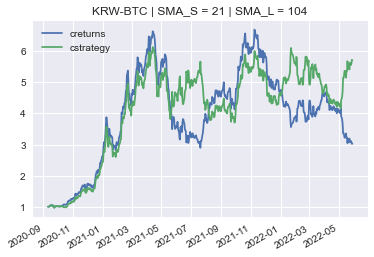

In [25]:
tester.plot_returns()